# powerindex

A python library to compute power indices

## What is all about

The aim of the package is to compute different power indices of the so-called weighted voting systems (games). This package was employed to perform calculations at [powdist.com](powdist.com)

Players have weights and can form coalitions. A coalition that achieves the required threshold wins.

To start with a simple example, consider a system with two parties __A__ and  **B** having 51 and 49 seats respectively with a simple majority rule (i.e. the threshold is 51 seats). How much power do they have? It may appear that according to the number of the seats they have 51% and 49% respectively.

However, party **A** can impose any decision without cooperating with party __B__.

It leads to a conclusion that any reasonable rule would assign to party **A** 100% of the power (since it wins without cooperation) and to the party __B__ 0% of the power and not 51% to 49%.

The most popular approaches to measure power are [Banzhaf](http://en.wikipedia.org/wiki/Banzhaf_power_index) and [Shapley-Shubik](http://en.wikipedia.org/wiki/Shapley–Shubik_power_index) power indices.




## Installation

The standard instalation with pip will install both the PYthon library and the command-line tool `px` based on it.

In [1]:
!pip install powerindex

DEPRECATION: torchsde 0.2.5 has a non-standard dependency specifier numpy>=1.19.*; python_version >= "3.7". pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of torchsde or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


## How to use it

Below, both the examples for using the Unix-like command-line (CLI) and python library are shown.

One can look up the flags of the CLI tools typeing `px -h` in teh terminal:

In [2]:
!px -h

usage: px [-h] [-i INDEX] [-q QUOTA] -w WEIGHT [WEIGHT ...] [-a]

Calculate power index

optional arguments:
  -h, --help            show this help message and exit
  -i INDEX, --index INDEX
                        Power index type (default: ss)
  -q QUOTA, --quota QUOTA
                        Quota value (default: half of the sum of weights)
  -w WEIGHT [WEIGHT ...], --weights WEIGHT [WEIGHT ...]
                        integer weights (or votes integers)
  -a, --absolute        Calculate a power index in absolute values (weights
                        times quote - makes sense rather for contested
                        garment)


Let's start with the trivial example from the introduction:

In [3]:
# python
%matplotlib inline
import powerindex as px
game=px.Game(quota=51,weights=[51,49])

Now calculate Banzhaf and Shapley-Shubik power indices:

In [4]:
game.calc_banzhaf()
print(game.banzhaf)

[1.0, 0.0]


In [5]:
game.calc_shapley_shubik()
print(game.shapley_shubik)

[1.0, 0.0]


The same can be done in the command line:

In [6]:
# bash command line
# the simplest call (S-S power index by default, and majourity rule by default): 
!px -w 51 49

[1.0, 0.0]


In [7]:
# specify the number of votes for the winning coalition explicitly ('-q' flag), and Banzhaf index ('-i' flag)
!px -i b -q 51 -w 51 49

[1.0, 0.0]


Function calc() computes all available indices.

Thus, in this simple example both indices give 100% to 0% distribution.

Now let's changes the seats distribution to the parity and see what happens:

In [8]:
game=px.Game(51,weights=[50,50])
game.calc()

print(game.banzhaf)
print(game.shapley_shubik)

[0.5, 0.5]
[0.5, 0.5]


In [9]:
#same in command line:
!px -w 50 50
!px -i b -w 50 50

[0.5, 0.5]
[0.5, 0.5]


As the result, the power distribution is also at parity.

Now, consider a non-trivial, but still simple examples from [Wikipedia](https://en.wikipedia.org/wiki/Banzhaf_power_index#Simple_voting_game):

In [10]:
game=px.Game(6,[4, 3, 2, 1])
game.calc_banzhaf()
print(game.banzhaf)

[0.4166666666666667, 0.25, 0.25, 0.08333333333333333]


In [11]:
# same in the command line
!px -i b -q 6 -w 4 3 2 1

[0.4166666666666667, 0.25, 0.25, 0.08333333333333333]


Interpretation is simple. A committee where 4 parties hold 40%, 30%, 20% and 10% of seats with required qualified majority of 60%, have 41.7%, 25%, 25%, 8.3% of power respectively.

In this example, having 2 or 3 seats leads to the same level of power.

Another example:

In [12]:
game=px.Game(6,[3, 2, 1, 1])
game.calc_banzhaf()
print(game.banzhaf)

[0.375, 0.375, 0.125, 0.125]


In [13]:
# same in command line:
!px -i b -q 6 -w 3 2 1 1

[0.375, 0.375, 0.125, 0.125]


Notice that in the previous two examples Banzhaf and Shapley-Shubik indices coincides. It doesn't hold in general even in the games of 3 voters:

In [14]:
game=px.Game(4,[3, 2, 1])
game.calc() # again it calculates all available indices
print("Banzhaf index:")
print(game.banzhaf)
print("Shapley-Shubik index:")
print(game.shapley_shubik)

Banzhaf index:
[0.6, 0.2, 0.2]
Shapley-Shubik index:
[0.6666666666666667, 0.16666666666666669, 0.16666666666666669]


In [15]:
#same in command line
!echo "Banzhaf index:"
!px -i b -q 4 -w 3 2 1
!echo "Shapley-Shubik index:"
!px -i ss -q 4 -w 3 2 1

Banzhaf index:
[0.6, 0.2, 0.2]
Shapley-Shubik index:
[0.6666666666666667, 0.16666666666666669, 0.16666666666666669]


Example from the European Economic Community (EEC) ([wiki](https://en.wikipedia.org/wiki/European_Economic_Community)) interesting for the issue that Luxembourg had one vote, but it had zero power.

In [16]:
# EEC (1958-1982): Germany, France, Italy, Netherlands, Belgium, Luxemburg
!px -i b -q 12 -w 4 4 4 2 2 1
# expected result:
# [0.23809523809523808, 0.23809523809523808, 0.23809523809523808, 0.14285714285714285, 0.14285714285714285, 0.0]

[0.23809523809523808, 0.23809523809523808, 0.23809523809523808, 0.14285714285714285, 0.14285714285714285, 0.0]


In [17]:
game=px.Game(12,[4, 4, 4, 2, 2, 1])
game.calc_banzhaf()
print(game.banzhaf)

[0.23809523809523808, 0.23809523809523808, 0.23809523809523808, 0.14285714285714285, 0.14285714285714285, 0.0]


## Contested Garment Rule

Not exactly a power index, but similar to some extent. The Contested Garment Rule ([wiki](https://en.wikipedia.org/wiki/Contested_garment_rule)) offers a way to split the value of the contested asset when its value is smaller than the some of claims.
It's different from the proportional rule.  
e.g. if the claims are 100, 200 and 300 (i.e. 600 in sum) among three participants, and there's only 210 to split, the rule suggests the split 50, 80, 80 (and not 35, 70, 105).  
Note the flag `-a` (absolute) to generate the split in the absolute numbers.

In [18]:
!px -i cg -q 210 -a -w 100 200 300

[50.0, 80.0, 80.0]


In [19]:
game=px.Game(210,[100, 200, 300], absolute=True)
game.calc_contested_garment()
print(game.contested_garment)

[50.0, 80.0, 80.0]


## CLI

Some more advanced handling with the CLI. e.g. one can read the weights from the file

In [20]:
# the contents of the file examples/eec1957.txt
!cat examples/eec1957.csv

4,4,4,2,2,1


In [21]:
# note that comma was translated into whitespace with `tr` command
!px -i bz -w $(cat examples/eec1957.csv | tr , $' ')
# one can save the output of the command to the file:
# !px -i bz -w $(cat examples/eec1957.csv | tr , $' ') > output.csv

[0.23333333333333334, 0.23333333333333334, 0.23333333333333334, 0.1, 0.1, 0.1]


## Plot results

There's a possibility to plot the power distribution as a pie chart:

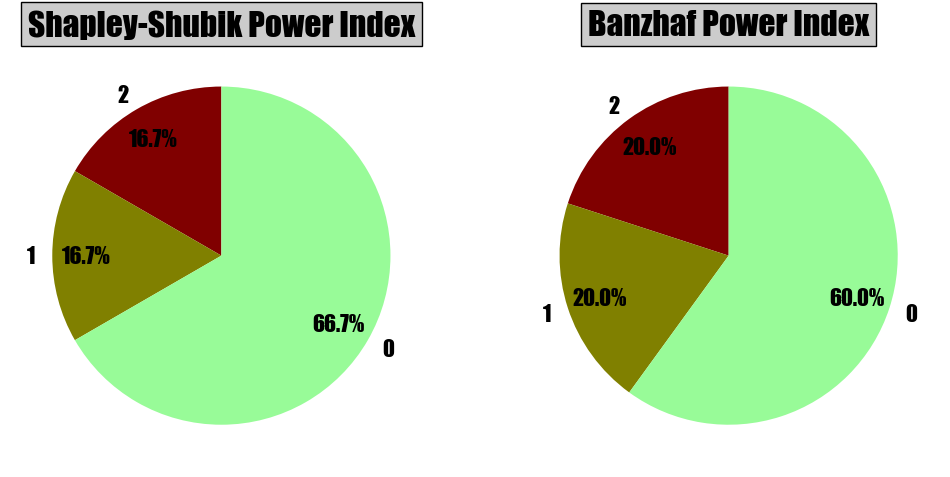

In [22]:
game=px.Game(4,[3, 2, 1])
game.calc()
game.pie_chart()

As you can see on the plot, the parties have numbers. In order, to put their names on the chart you need to work with Party class. 

Let's take Europen Economic Community (EEC) in the years 1958-1972, its members were Germany (4 votes), France (4 votes), Italy (4 votes), Belgium (2 votes), Netherlands (2 votes) and Luxembourg (1 vote) with qualified majority of 12 votes:

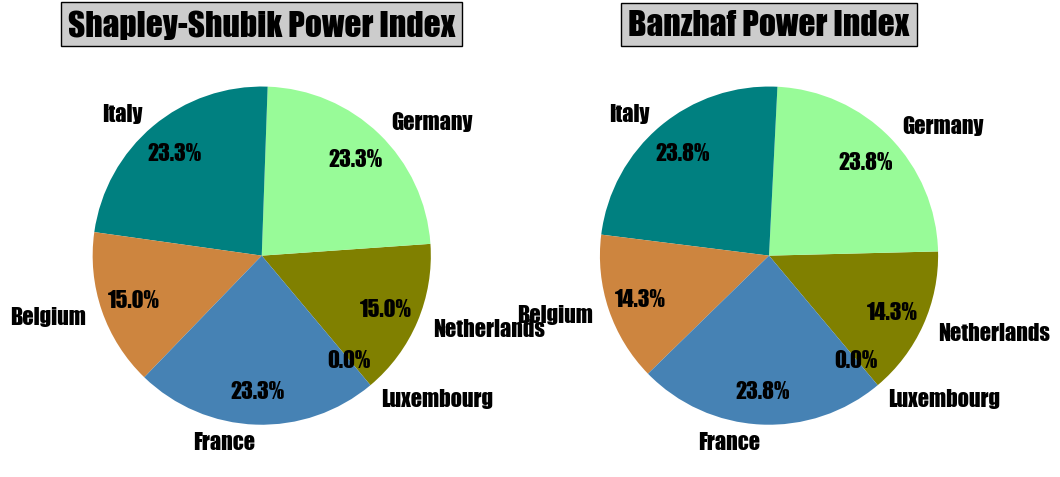

In [23]:
countries={"Germany":4,"France":4,"Italy":4,"Belgium":2,"Netherlands":2,"Luxembourg":1}
parties=[px.Party(countries[country],country) for country in countries]
game=px.Game(12,parties=parties)
game.calc()
game.pie_chart()


## On computation

Usually the exact and fast computation of indices is based on enumeration methods implemented by dynamic programming given that the weights and thresholds are integers. 

For instance, the computation of Banzhaf is O(qn) hard and computation of Shapley-Shubik is O(qn^2) hard. If the input has non-integers, then an approximation scheme is usually involved. Consult the list of literature if you want to start exploring the topic by yourself.

## Literature

B.Keijzer - A Survey on the Computation of Power Indices (2008)

T.Uno - Efficient Computation of Power Indices for Weighted Majority Games (2003)

Matsui, Y. Matsui - A Survey of Algorithms for Calculating Power Indices of Weighted Majority Games (2000)

B.Meglicki - Generating functions partitioning algorithm for computing power indices in weighted voting games (2010)

Zyczkowski, W. Slomczynski - Voting in the European Union: the square root system of Penrose and a critical point (2004)